In [259]:
import src.metrics as mt
import src.visualization as vis
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import src.downloader as dw
import os
import sys

# In Jupyter notebooks __file__ is not defined, so fall back to the current working directory.
try:
    base_dir = os.path.dirname(__file__)
except NameError:
    base_dir = os.getcwd()

sys.path.append(os.path.join(base_dir, 'src'))

In [260]:
data = dw.download_data("AAPL", start_date="2025-01-01")

print(data)

[*********************100%***********************]  1 of 1 completed

Price            Close
Ticker            AAPL
Date                  
2025-01-02  242.752090
2025-01-03  242.264297
2025-01-06  243.896912
2025-01-07  241.119476
2025-01-08  241.607269
...                ...
2026-01-05  267.260010
2026-01-06  262.359985
2026-01-07  260.329987
2026-01-08  259.040009
2026-01-09  258.450012

[256 rows x 1 columns]


In [261]:
day_returns = mt.daily_returns(data)
print("Daily Returns:\n", day_returns)

Daily Returns:
 Ticker          AAPL
Date                
2025-01-02       NaN
2025-01-03 -0.002009
2025-01-06  0.006739
2025-01-07 -0.011388
2025-01-08  0.002023
...              ...
2026-01-05 -0.013837
2026-01-06 -0.018334
2026-01-07 -0.007737
2026-01-08 -0.004955
2026-01-09 -0.002278

[256 rows x 1 columns]


In [262]:
daily_vol = (mt.daily_volatility(day_returns))
daily_vol_float = daily_vol.iloc[0]
print(f"Daily Volatility: {daily_vol_float*100:.2f}%")

Daily Volatility: 2.03%


In [264]:
annual_returns= mt.annual_returns(daily_vol)
annual_returns_float = annual_returns.iloc[0]
print(f"Annualized Volatility: {annual_returns_float*100:.2f}%")


Annualized Volatility: 32.18%


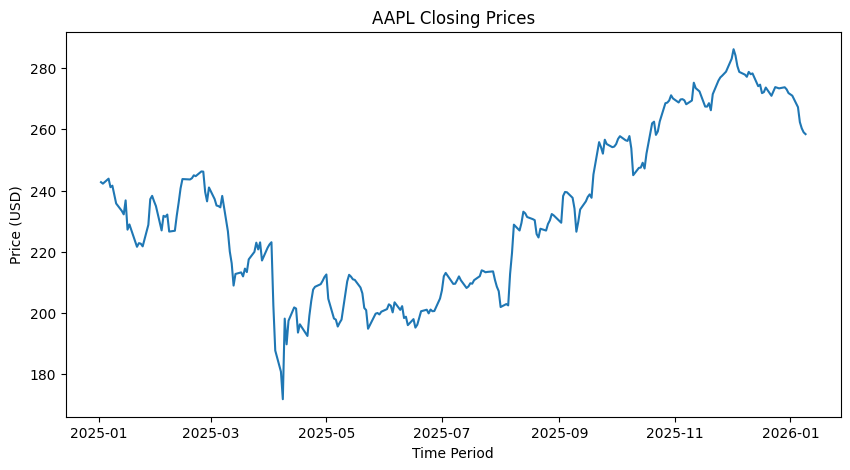

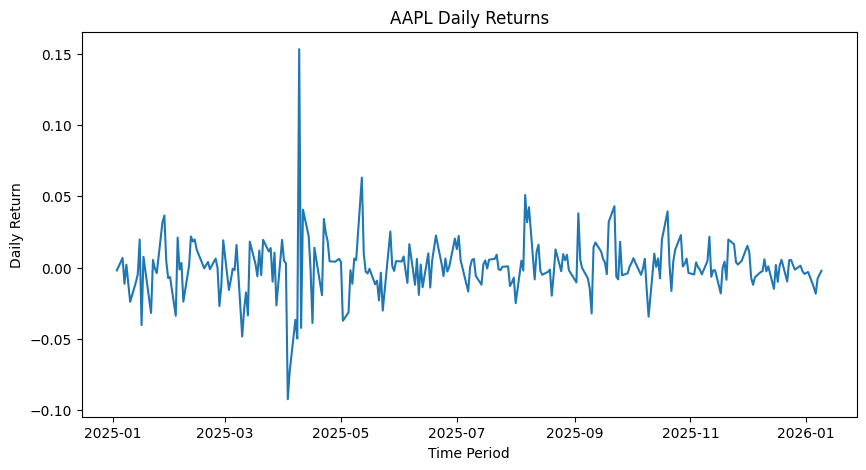

In [272]:
plt.figure(figsize=(10, 5))
plt.plot(data.index, data['Close'], label='Closing Price')
plt.title('AAPL Closing Prices')
plt.xlabel('Time Period')
plt.ylabel('Price (USD)')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(day_returns, label='Daily Returns')
plt.title('AAPL Daily Returns')
plt.xlabel('Time Period')
plt.ylabel('Daily Return') 
plt.show()